In [1]:
#--- Library Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ema_workbench import load_results
from ema_workbench.analysis import dimensional_stacking

In [2]:
#--- Configuration ---
# Path to the saved exploratory experiment results
RESULTS_FILE_PATH = "../experimental data/pf_0_exploratory_runs_levers_as_factors.tar.gz"

# Define the percentile for "desirable" outcomes (e.g., 0.10 for the best 10%)
DESIRABLE_PERCENTILE_deaths = 0.10
DEATHS_COL_SYSTEMWIDE = 'Expected Number of Deaths' # This is a system-wide outcome in PF3


In [3]:
# --- 1. Load EMA Workbench Results ---
print(f"INFO: Loading results from: {RESULTS_FILE_PATH}")
try:
    # experiments_array is a NumPy structured array
    # raw_outcomes_dict contains 1D NumPy arrays for PF0 ScalarOutcomes
    experiments_array, raw_outcomes_dict = load_results(RESULTS_FILE_PATH)
    print(f"INFO: Successfully loaded results.")
    print(f"INFO: experiments_array shape: {experiments_array.shape}")
    print(f"INFO: raw_outcomes_dict contains {len(raw_outcomes_dict)} outcomes.")
except FileNotFoundError:
    print(f"ERROR: Results file not found at {RESULTS_FILE_PATH}. Please check the path.")
    raise 
except Exception as e:
    print(f"ERROR: An unexpected error occurred while loading results: {e}")
    raise

#Check if the desired columns for A.5 are present in the raw_outcomes_dict

INFO: Loading results from: ../experimental data/pf_0_exploratory_runs_levers_as_factors.tar.gz
INFO: Successfully loaded results.
INFO: experiments_array shape: (2000, 53)
INFO: raw_outcomes_dict contains 2 outcomes.


In [4]:
# --- 2. Convert Results to Pandas DataFrames ---

# Convert experiments array to DataFrame
try:
    experiments_df = experiments_array
    print(f"INFO: Converted experiments_array to DataFrame. Shape: {experiments_df.shape}")
except Exception as e:
    print(f"ERROR: Failed to convert experiments_array to DataFrame: {e}")
    raise

try:
    outcomes_df = pd.DataFrame(raw_outcomes_dict)
    print(f"INFO: Converted raw_outcomes_dict to DataFrame. Shape: {outcomes_df.shape}")
except Exception as e:
    print(f"ERROR: Failed to convert raw_outcomes_dict to DataFrame: {e}")
    raise

# Verify that the required outcome columns for Deventer and system-wide RfR exist
required_outcome_cols_for_prim = [DEATHS_COL_SYSTEMWIDE]
missing_cols = [col for col in required_outcome_cols_for_prim if col not in outcomes_df.columns]
if missing_cols:
    print(f"ERROR: Required outcome column(s) for PRIM not found in outcomes_df: {missing_cols}")
    print(f"Available outcome columns: {outcomes_df.columns.tolist()}")
   

INFO: Converted experiments_array to DataFrame. Shape: (2000, 53)
INFO: Converted raw_outcomes_dict to DataFrame. Shape: (2000, 2)


In [5]:
#define the desired outcomes
# Minimize total number of expected deaths
# initiate percentile 
desirable_percentile_deaths_rws = 0.1
threshold_deaths_rws = outcomes_df[DEATHS_COL_SYSTEMWIDE].quantile(desirable_percentile_deaths_rws)
#create desired outcomes array
y_desirable_deaths_rws = outcomes_df[DEATHS_COL_SYSTEMWIDE] <= threshold_deaths_rws
num_desirable_cases = np.sum(y_desirable_deaths_rws)
print(num_desirable_cases)

if num_desirable_cases == 0:
    print("WARNING: No scenarios meet all desirable criteria with the current thresholds. "
          "PRIM analysis cannot proceed. Consider relaxing thresholds or checking data.")
    
#The lowest percentile doable is between 0.01 and 0.1 and it's 754 deaths

467


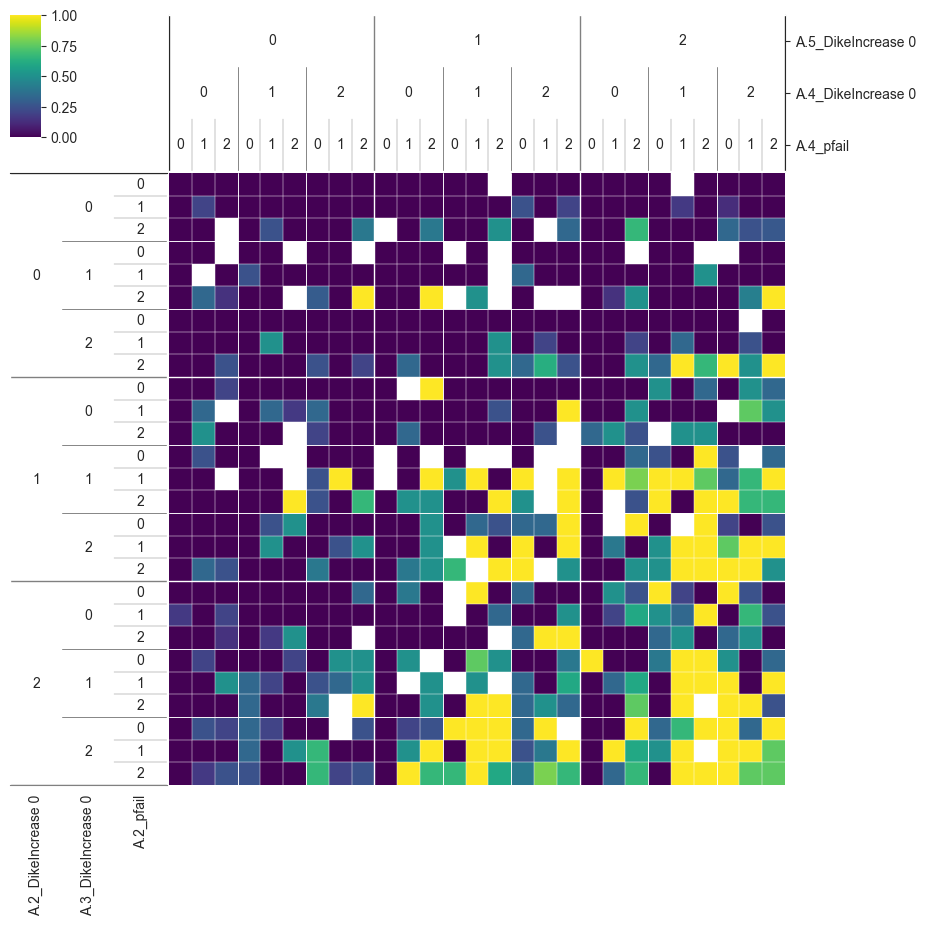

In [7]:
dimensional_stacking.create_pivot_plot(experiments_df,np.array(y_desirable_deaths_rws))
plt.show()

### Insights

For RWS the lever which most influences their desired outcomes is the dike increase. Especially around your dike ring, the RWS will want to maintain a higher level of dike increase to minimize deaths.  The RWS will likely push for similar policies in the A3 and A2 areas, where also the uncertainitiy related ot the probabiliy of failure is of high interest.
If there were an outcome to measure hydraulic performance, this would probably be be aligned with a high dike increase (to create more energy) and would end up further solidifying the choice to keep the lever within its higher range. 